In [1]:
#Load required libraries

import sys
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from statistics import mean
from statistics import median
from statistics import mode
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE

In [2]:
#Loading data in dataframe

df = pd.read_csv('vctk_neutral.csv')
[n_samples, columns] = df.shape
n_features = columns - 1

print("The number of samples is:",n_samples)
print("The number of features is:",n_features)

print("Display of the first five samples:")
df.head()

The number of samples is: 22391
The number of features is: 387
Display of the first five samples:


,name,pcm_RMSenergy_sma_max,pcm_RMSenergy_sma_min,pcm_RMSenergy_sma_range,pcm_RMSenergy_sma_maxPos,pcm_RMSenergy_sma_minPos,pcm_RMSenergy_sma_amean,pcm_RMSenergy_sma_linregc1,pcm_RMSenergy_sma_linregc2,pcm_RMSenergy_sma_linregerrQ,...,F0_sma_de_amean,F0_sma_de_linregc1,F0_sma_de_linregc2,F0_sma_de_linregerrQ,F0_sma_de_stddev,F0_sma_de_skewness,F0_sma_de_kurtosis,class,age,gender
0,'norm_p225_001_mic1.wav',0.078522,0.000601,0.077921,39.0,135.0,0.018079,-0.000109,0.025440,0.000399,...,-2.394047e-08,-0.047776,3.224863,355.3021,18.94255,-0.101913,6.932060,p225,23.0,F
1,'norm_p225_002_mic1.wav',0.062318,0.000635,0.061683,197.0,232.0,0.011488,-0.000046,0.016991,0.000156,...,5.914483e-08,-0.014323,1.704494,477.6036,21.87648,-0.632278,5.367091,p225,23.0,F
2,'norm_p225_003_mic1.wav',0.071541,0.000287,0.071254,32.0,16.0,0.012099,-0.000019,0.017222,0.000160,...,1.430196e-08,-0.001878,0.509987,333.0040,18.25078,0.082032,5.408942,p225,23.0,F
3,'norm_p225_004_mic1.wav',0.104360,0.000534,0.103826,17.0,145.0,0.013753,-0.000079,0.025651,0.000299,...,-4.396693e-02,-0.005060,0.717519,368.2229,19.19420,0.048580,5.166056,p225,23.0,F
4,'norm_p225_005_mic1.wav',0.070350,0.000376,0.069974,28.0,151.0,0.010565,-0.000025,0.016108,0.000118,...,8.880454e-02,-0.003048,0.760918,504.3098,22.46021,0.004693,4.398761,p225,23.0,F


In [3]:
#Display of categorical features

print('Display of categorical features by the database specification:','\n')
df_categorical = df[['name','class','gender','age']]
df_categorical.head()

Display of categorical features by the database specification: 



,name,class,gender,age
0,'norm_p225_001_mic1.wav',p225,F,23.0
1,'norm_p225_002_mic1.wav',p225,F,23.0
2,'norm_p225_003_mic1.wav',p225,F,23.0
3,'norm_p225_004_mic1.wav',p225,F,23.0
4,'norm_p225_005_mic1.wav',p225,F,23.0


The number of male speakers is: 27
The number of female speakers is: 28


Graphic representation of the ratio between men and women in the database: 


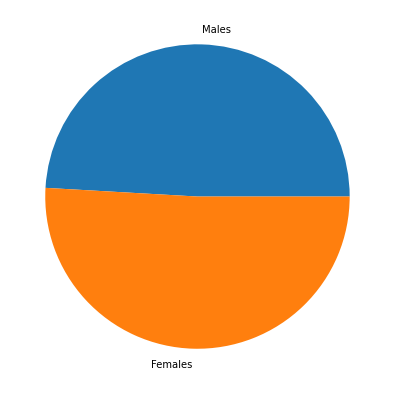

In [4]:
#Analysis of speakers by gender

df_M = df[df['gender'] == 'M']
df_F = df[df['gender'] == 'F']

speakers_M = df_M['class'].unique()
speakers_F = df_F['class'].unique()

n_M = len(speakers_M)
n_F = len(speakers_F)

print('The number of male speakers is:',n_M)
print('The number of female speakers is:',n_F)

print('\n')
print('Graphic representation of the ratio between men and women in the database: ')

fig = plt.figure(figsize =(10, 7))
plt.pie([n_M, n_F], explode=None, labels=['Males', 'Females'], colors=None, autopct=None, shadow=False)
plt.show()

The average age of the speaker is 22.88 years.
The median age per speaker is 22 years.
The mode of age per speaker is 22 years.
The age of the oldest speaker is 38 years.
The age of the youngest speaker is 19 years.


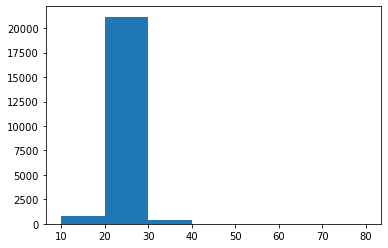

In [5]:
#Speaker analysis by age

df_age = df['age']
print('The average age of the speaker is',round(df_age.mean(),2),'years.')
print('The median age per speaker is',int(df_age.median()),'years.')
print('The mode of age per speaker is',int(df_age.mode()),'years.')
print('The age of the oldest speaker is',int(df_age.max()),'years.')
print('The age of the youngest speaker is',int(df_age.min()),'years.')

group_names = ['11-20','21-30','31-40','41-50','51-60','61-70','71-80']
bins = ([10,20,30,40,50,60,70,80])

plt.hist(df_age, bins = bins, label = group_names)
plt.show() 

In [6]:
#From the table shown above we can see that only 4 categorical features are present. These are the name of the recording, 
#the person (speaker code), as well as its gender and age. From these features, we will remove the name of the recording, 
#since each name is unique, as well as a age and sex since they are not input features (and part of the voice). 
#Also they are not required as a system output. We leave only speaker code (class) which represents the output of the system.

print('From the table shown above we can see that only 4 categorical features are present. These are the name of the recording,')
print('the person (speaker code), as well as its gender and age. From these features, we will remove the name of the recording,')
print('since each name is unique, as well as a age and sex since they are not input features (and part of the voice).')
print('Also they are not required as a system output. We leave only speaker code (class) which represents the output of the system.')
print()

df.drop('name',axis = 1,inplace = True)
df.drop('gender',axis = 1,inplace = True)
df.drop('age',axis = 1,inplace = True)

n_features = n_features-3

#Then we check if the features have missing values

print('Then we check if the features have missing values:\n')
n_missing = df.isnull().sum().sort_values(ascending=False)
print(n_missing)

print("\nThe total number of missing values is "+ str(n_missing.sum())+'.')

From the table shown above we can see that only 4 categorical features are present. These are the name of the recording,
the person (speaker code), as well as its gender and age. From these features, we will remove the name of the recording,
since each name is unique, as well as a age and sex since they are not input features (and part of the voice).
Also they are not required as a system output. We leave only speaker code (class) which represents the output of the system.

Then we check if the features have missing values:

pcm_RMSenergy_sma_max                 0
pcm_RMSenergy_sma_de_min              0
pcm_fftMag_mfcc_sma_de[5]_kurtosis    0
pcm_fftMag_mfcc_sma_de[5]_skewness    0
pcm_fftMag_mfcc_sma_de[5]_stddev      0
                                     ..
pcm_fftMag_mfcc_sma[10]_linregc1      0
pcm_fftMag_mfcc_sma[10]_amean         0
pcm_fftMag_mfcc_sma[10]_minPos        0
pcm_fftMag_mfcc_sma[10]_maxPos        0
class                                 0
Length: 385, dtype: int64

Th

In [7]:
#The number of classes (speakers) in the database

classes = df['class'].unique()
print('Number of classes (speakers) in the database is '+ str(len(classes)) +'.')

Number of classes (speakers) in the database is 55.


In [8]:
#Statistical parameters of classes

print('Statistical parameters of classes')

sentences = []
samples = []
a_priori_probabilities = []

for speaker in classes:
    speaker_samples = df[df['class']==speaker]
    n_sentences = speaker_samples.shape[0]
    a_priori_probability = round(n_sentences/n_samples,3)
    sentences.append(n_sentences)
    samples.append({speaker : n_sentences})
    a_priori_probabilities.append({speaker : a_priori_probability})
    
print('\n')
print('Number of sentences per speaker (class) is: ')
print(samples)
print('\n')

print('The mean number of sentences per speaker is:',round(mean(sentences),2))
print('The median number of sentences per speaker is:',median(sentences))
print('The mode number of sentences per speaker is:',mode(sentences))
print('The maximum number of sentences per speaker is:',max(sentences))
print('The minimum number of sentences per speaker is:',min(sentences))

print('\n')
print('A priori probability by speakers (classes) is:')
print(a_priori_probabilities)

Statistical parameters of classes


Number of sentences per speaker (class) is: 
[{'p225': 231}, {'p226': 356}, {'p227': 389}, {'p228': 366}, {'p229': 379}, {'p230': 397}, {'p231': 456}, {'p232': 411}, {'p233': 372}, {'p234': 357}, {'p236': 492}, {'p237': 339}, {'p238': 454}, {'p239': 502}, {'p240': 377}, {'p241': 353}, {'p243': 393}, {'p244': 420}, {'p245': 354}, {'p246': 358}, {'p247': 475}, {'p248': 376}, {'p249': 335}, {'p250': 481}, {'p251': 364}, {'p252': 395}, {'p253': 375}, {'p254': 396}, {'p255': 379}, {'p256': 319}, {'p257': 434}, {'p258': 413}, {'p259': 481}, {'p260': 356}, {'p261': 474}, {'p262': 394}, {'p263': 471}, {'p264': 483}, {'p265': 348}, {'p266': 422}, {'p267': 417}, {'p268': 406}, {'p269': 396}, {'p270': 462}, {'p271': 454}, {'p272': 411}, {'p273': 433}, {'p274': 466}, {'p275': 416}, {'p276': 462}, {'p277': 458}, {'p278': 409}, {'p279': 405}, {'p280': 410}, {'p281': 459}]


The mean number of sentences per speaker is: 407.11
The median number of sentences per spea

In [9]:
#Separation of input and output parameters

y = df['class']
x = df.drop(['class'], axis = 1)

x.head()

,pcm_RMSenergy_sma_max,pcm_RMSenergy_sma_min,pcm_RMSenergy_sma_range,pcm_RMSenergy_sma_maxPos,pcm_RMSenergy_sma_minPos,pcm_RMSenergy_sma_amean,pcm_RMSenergy_sma_linregc1,pcm_RMSenergy_sma_linregc2,pcm_RMSenergy_sma_linregerrQ,pcm_RMSenergy_sma_stddev,...,F0_sma_de_range,F0_sma_de_maxPos,F0_sma_de_minPos,F0_sma_de_amean,F0_sma_de_linregc1,F0_sma_de_linregc2,F0_sma_de_linregerrQ,F0_sma_de_stddev,F0_sma_de_skewness,F0_sma_de_kurtosis
0,0.078522,0.000601,0.077921,39.0,135.0,0.018079,-0.000109,0.025440,0.000399,0.020423,...,126.3978,11.0,30.0,-2.394047e-08,-0.047776,3.224863,355.3021,18.94255,-0.101913,6.932060
1,0.062318,0.000635,0.061683,197.0,232.0,0.011488,-0.000046,0.016991,0.000156,0.012899,...,144.4312,4.0,226.0,5.914483e-08,-0.014323,1.704494,477.6036,21.87648,-0.632278,5.367091
2,0.071541,0.000287,0.071254,32.0,16.0,0.012099,-0.000019,0.017222,0.000160,0.013008,...,119.2224,7.0,221.0,1.430196e-08,-0.001878,0.509987,333.0040,18.25078,0.082032,5.408942
3,0.104360,0.000534,0.103826,17.0,145.0,0.013753,-0.000079,0.025651,0.000299,0.018615,...,118.3207,2.0,14.0,-4.396693e-02,-0.005060,0.717519,368.2229,19.19420,0.048580,5.166056
4,0.070350,0.000376,0.069974,28.0,151.0,0.010565,-0.000025,0.016108,0.000118,0.011345,...,133.6437,58.0,62.0,8.880454e-02,-0.003048,0.760918,504.3098,22.46021,0.004693,4.398761


In [10]:
#Making test and training sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=10, stratify=y)
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_train, y_train, train_size=0.25, 
                                                        test_size=0.05, random_state=10, stratify=y_train)

#Standardization of values

s = StandardScaler()
s.fit(x_train)
x_train = s.transform(x_train)
x_test = s.transform(x_test)

s1 = StandardScaler()
s1.fit(x_train1)
x_train1 = s1.transform(x_train1)
x_test1 = s1.transform(x_test1)

In [11]:
#Recording results

results = pd.DataFrame(columns = ['classifier',
                                  'reduction of dimensionality', 
                                  'accuracy score [%]', 
                                  'recall score [%]',
                                  'precision_score [%]',
                                  'f score [%]',
                                  'classification time [s]',
                                  'number of dimensions'])

In [12]:
#SVM classifier without dimensionality reduction

#Searching for the best parameters

# start = time.time()

# parameters = {'C':(1.0,50.0,100.0),
#               'kernel':('linear', 'poly', 'rbf', 'sigmoid'),
#               'degree':(3,5,7),
#               'gamma':('scale', 'auto'),
#               'decision_function_shape':('ovo','ovr')}

# dt = SVC()
# clf=GridSearchCV(dt, parameters)
# clf.fit(x_train1, y_train1)

# end = time.time()
# t = end-start

# print('The best result is ' + str(clf.best_score_) + '.')
# print('The best parameters are:',clf.best_params_)
# print('The duration of the analysis is', round(t//3600), 'hours and', round((t%3600)/60),'minutes.')

#Results

# The best result is 0.9438200453965102.
# The best parameters are: {'C': 1.0, 'decision_function_shape': 'ovo', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}
# The duration of the analysis is 1 hours and 1 minutes.

In [13]:
#Final classification by SVM classifier without dimensionality reduction

classifier = SVC(C = 1.0, decision_function_shape = 'ovo', degree = 3, gamma = 'scale', kernel = 'linear')
classifier.fit(x_train, y_train)

start = time.time()
y_pred = classifier.predict(x_test)
end = time.time()

t = end-start

conf_mat = confusion_matrix(y_test, y_pred)
accuracy = round(accuracy_score(y_test, y_pred)*100,3)
recall = round(recall_score(y_test, y_pred, average='macro')*100,3)
precision = round(precision_score(y_test, y_pred, average='macro')*100,3)
f_score = round(f1_score(y_test, y_pred, average='macro')*100,3)

print('The accuracy of the classifier is:', accuracy, '%.')
print('The recall of the classifier is:', recall, '%.')
print('The precision of the classifier is:', precision, '%.')
print('The F score of the classifier is:', f_score, '%.')
print('The duration of the classification is:', round(t,4) ,'seconds.')

print('\n')

print('The resulting confusion matrix:')
np.set_printoptions(threshold=sys.maxsize)
print(conf_mat)

data = {'classifier':'SVM',
         'reduction of dimensionality': '/',
         'accuracy score [%]':accuracy,
         'recall score [%]':recall,
         'precision_score [%]':precision,
         'f score [%]':f_score,
         'classification time [s]':round(t,4),
         'number of dimensions':round(n_features)}

results = results.append(data, ignore_index=True)

The accuracy of the classifier is: 97.946 %.
The recall of the classifier is: 97.869 %.
The precision of the classifier is: 97.994 %.
The F score of the classifier is: 97.903 %.
The duration of the classification is: 9.3566 seconds.


The resulting confusion matrix:
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   1  0  0  0  0  0  0]
 [ 0  0 39  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0  0  0  0  0  

C:\Users\igorm\AppData\Local\Temp\ipykernel_8240\3238114463.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(data, ignore_index=True)


In [14]:
#Naive Bayesian classifier without dimensionality reduction

classifier = GaussianNB()
classifier.fit(x_train, y_train)

start = time.time()
y_pred = classifier.predict(x_test)
end = time.time()

t = end-start

conf_mat = confusion_matrix(y_test, y_pred)
accuracy = round(accuracy_score(y_test, y_pred)*100,3)
recall = round(recall_score(y_test, y_pred, average='macro')*100,3)
precision = round(precision_score(y_test, y_pred, average='macro')*100,3)
f_score = round(f1_score(y_test, y_pred, average='macro')*100,3)

print('The accuracy of the classifier is:', accuracy, '%.')
print('The recall of the classifier is:', recall, '%.')
print('The precision of the classifier is:', precision, '%.')
print('The F score of the classifier is:', f_score, '%.')
print('The duration of the classification is:', round(t,4) ,'seconds.')

print('\n')

print('The resulting confusion matrix:')
np.set_printoptions(threshold=sys.maxsize)
print(conf_mat)

data = {'classifier':'naive Bayes',
         'reduction of dimensionality': '/',
         'accuracy score [%]':accuracy,
         'recall score [%]':recall,
         'precision_score [%]':precision,
         'f score [%]':f_score,
         'classification time [s]':round(t,4),
         'number of dimensions':round(n_features)}

results = results.append(data, ignore_index=True)

The accuracy of the classifier is: 81.027 %.
The recall of the classifier is: 80.78 %.
The precision of the classifier is: 83.194 %.
The F score of the classifier is: 81.408 %.
The duration of the classification is: 0.6047 seconds.


The resulting confusion matrix:
[[19  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0  1  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  1  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  1  0  0  0  0  1  0  0  0  0  0  0  0  1  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
   0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  1  1  0  0]
 [ 0  0  0 27  0  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  2  1  3  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0 32  1  1  0  0  0  0  0  0  1  0

C:\Users\igorm\AppData\Local\Temp\ipykernel_8240\960706466.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(data, ignore_index=True)


In [15]:
#KNN classifier without dimensionality reduction

##Searching for the best parameters

# start = time.time()

# parameters = {'metric':('euclidean', 'chebyshev', 'minkowski', 'jaccard'),  
#              'n_neighbors':[1,3,5,7]}

# dt = KNeighborsClassifier()
# clf=GridSearchCV(dt, parameters)
# clf.fit(x_train1, y_train1)

# end = time.time()
# t = end-start

# print('The best result is ' + str(clf.best_score_) + '.')
# print('The best parameters are:',clf.best_params_)
# print('The duration of the analysis is', round(t//3600), 'hours and', round((t%3600)/60),'minutes.')

#Results

# The best result is 0.7548166800649423.
# The best parameters are: {'metric': 'euclidean', 'n_neighbors': 7}
# The duration of the analysis is 0 hours and 1 minutes.

In [16]:
#Final classification by kNN classifier without reduction of dimensionality

classifier = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
classifier.fit(x_train, y_train)

start = time.time()
y_pred = classifier.predict(x_test)
end = time.time()

t = end-start

conf_mat = confusion_matrix(y_test, y_pred)
accuracy = round(accuracy_score(y_test, y_pred)*100,3)
recall = round(recall_score(y_test, y_pred, average='macro')*100,3)
precision = round(precision_score(y_test, y_pred, average='macro')*100,3)
f_score = round(f1_score(y_test, y_pred, average='macro')*100,3)

print('The accuracy of the classifier is:', accuracy, '%.')
print('The recall of the classifier is:', recall, '%.')
print('The precision of the classifier is:', precision, '%.')
print('The F score of the classifier is:', f_score, '%.')
print('The duration of the classification is:', round(t,4) ,'seconds.')

print('\n')

print('The resulting confusion matrix:')
np.set_printoptions(threshold=sys.maxsize)
print(conf_mat)

data = {'classifier':'knn',
         'reduction of dimensionality': '/',
         'accuracy score [%]':accuracy,
         'recall score [%]':recall,
         'precision_score [%]':precision,
         'f score [%]':f_score,
         'classification time [s]':round(t,4),
         'number of dimensions':round(n_features)}

results = results.append(data, ignore_index=True)

The accuracy of the classifier is: 83.973 %.
The recall of the classifier is: 83.54 %.
The precision of the classifier is: 85.349 %.
The F score of the classifier is: 83.57 %.
The duration of the classification is: 1.8466 seconds.


The resulting confusion matrix:
[[18  0  0  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  1  0
   0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  2  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  1]
 [ 0  0 36  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0
   0  0  0  1  0  0  0]
 [ 0  0  0 31  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  2  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  1 33  2  0  0  0  0  0  0  0  1  0 

C:\Users\igorm\AppData\Local\Temp\ipykernel_8240\452084132.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(data, ignore_index=True)


In [17]:
#Random forest classifier without dimensionality reduction

#Searching for the best parameters

# start = time.time()

# parameters = {'criterion':('gini', 'entropy'), 'max_depth':[5, 10, 15], 
#              'min_samples_split':[0.01, 0.05]}

# dt = RandomForestClassifier()
# clf=GridSearchCV(dt, parameters)
# clf.fit(x_train1, y_train1)

# end = time.time()
# t = end-start

# print('The best result is ' + str(clf.best_score_) + '.')
# print('The best parameters are:',clf.best_params_)
# print('The duration of the analysis is', round(t//3600), 'hours and', round((t%3600)/60),'minutes.')

#Results

# The best result is 0.844552221749342.
# The best parameters are: {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 0.01}
# The duration of the analysis is 0 hours and 13 minutes. 

In [18]:
#Final classification by random forest classifier without dimensionality reduction

classifier = RandomForestClassifier(criterion= 'gini', max_depth= 15, min_samples_split= 0.01)
classifier.fit(x_train, y_train)

start = time.time()
y_pred = classifier.predict(x_test)
end = time.time()

t = end-start

conf_mat = confusion_matrix(y_test, y_pred)
accuracy = round(accuracy_score(y_test, y_pred)*100,3)
recall = round(recall_score(y_test, y_pred, average='macro')*100,3)
precision = round(precision_score(y_test, y_pred, average='macro')*100,3)
f_score = round(f1_score(y_test, y_pred, average='macro')*100,3)

print('The accuracy of the classifier is:', accuracy, '%.')
print('The recall of the classifier is:', recall, '%.')
print('The precision of the classifier is:', precision, '%.')
print('The F score of the classifier is:', f_score, '%.')
print('The duration of the classification is:', round(t,4) ,'seconds.')

print('\n')

print('The resulting confusion matrix:')
np.set_printoptions(threshold=sys.maxsize)
print(conf_mat)

data = {'classifier':'random forest',
         'reduction of dimensionality': '/',
         'accuracy score [%]':accuracy,
         'recall score [%]':recall,
         'precision_score [%]':precision,
         'f score [%]':f_score,
         'classification time [s]':round(t,4),
         'number of dimensions':round(n_features)}

results = results.append(data, ignore_index=True)

The accuracy of the classifier is: 84.866 %.
The recall of the classifier is: 84.273 %.
The precision of the classifier is: 86.015 %.
The F score of the classifier is: 84.199 %.
The duration of the classification is: 0.11 seconds.


The resulting confusion matrix:
[[15  0  0  1  0  1  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  1  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  1  0
   0  0  0  0  0  0  0]
 [ 0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0  2  0
   0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  1  5  1  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0  0  0  0  0  0 

C:\Users\igorm\AppData\Local\Temp\ipykernel_8240\3571492019.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(data, ignore_index=True)


In [19]:
#Neural network classifier without dimensionality reduction

#Searching for the best parameters

# start = time.time()

# parameters = {'activation': ('logistic', 'tanh', 'relu'), 'solver': ('lbfgs', 'sgd', 'adam'),
#              'max_iter': [200, 500, 1000], 'learning_rate_init': [0.01, 0.1], 'n_iter_no_change': [3, 5, 10]}

# dt = MLPClassifier()
# clf=GridSearchCV(dt, parameters)
# clf.fit(x_train1, y_train1)

# end = time.time()
# t = end-start

# print('The best result is ' + str(clf.best_score_) + '.')
# print('The best parameters are:',clf.best_params_)
# print('The duration of the analysis is', round(t//3600), 'hours and', round((t%3600)/60),'minutes.')

#Results

# The best result is 0.9545366955123658.
# The best parameters are: {'activation': 'logistic', 'learning_rate_init': 0.01, 'max_iter': 1000, 'n_iter_no_change': 3, 'solver': 'sgd'}
# The duration of the analysis is 0 hours and 29 minutes.

In [20]:
#Final classification by neural network classifier without dimensionality reduction

classifier = MLPClassifier(activation= 'logistic', learning_rate_init= 0.01, max_iter= 1000, n_iter_no_change= 3, solver='sgd')
classifier.fit(x_train, y_train)

start = time.time()
y_pred = classifier.predict(x_test)
end = time.time()

t = end-start

conf_mat = confusion_matrix(y_test, y_pred)
accuracy = round(accuracy_score(y_test, y_pred)*100,3)
recall = round(recall_score(y_test, y_pred, average='macro')*100,3)
precision = round(precision_score(y_test, y_pred, average='macro')*100,3)
f_score = round(f1_score(y_test, y_pred, average='macro')*100,3)

print('The accuracy of the classifier is:', accuracy, '%.')
print('The recall of the classifier is:', recall, '%.')
print('The precision of the classifier is:', precision, '%.')
print('The F score of the classifier is:', f_score, '%.')
print('The duration of the classification is:', round(t,4) ,'seconds.')

print('\n')

print('The resulting confusion matrix:')
np.set_printoptions(threshold=sys.maxsize)
print(conf_mat)

data = {'classifier':'neural network',
         'reduction of dimensionality': '/',
         'accuracy score [%]':accuracy,
         'recall score [%]':recall,
         'precision_score [%]':precision,
         'f score [%]':f_score,
         'classification time [s]':round(t,4),
         'number of dimensions':round(n_features)}

results = results.append(data, ignore_index=True)

The accuracy of the classifier is: 98.482 %.
The recall of the classifier is: 98.423 %.
The precision of the classifier is: 98.523 %.
The F score of the classifier is: 98.456 %.
The duration of the classification is: 0.02 seconds.


The resulting confusion matrix:
[[22  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0 39  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0  0  0  0  0  0 

C:\Users\igorm\AppData\Local\Temp\ipykernel_8240\2684894947.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(data, ignore_index=True)


In [21]:
#PCA dimensionality reduction

pca = PCA(n_components=0.95)
pca.fit(x_train)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
pca_dimensions = pca.n_components_
print('Reduced space has the', pca_dimensions,'dimensions.')

pca1 = PCA(n_components=pca_dimensions)
pca1.fit(x_train1)
x_train_pca1 = pca1.fit_transform(x_train1)

Reduced space has the 176 dimensions.


In [22]:
#SVM classifier with PCA dimensionality reduction

#Searching for the best parameters

# start = time.time()

# parameters = {'C':(1.0,50.0,100.0),
#               'kernel':('linear', 'poly', 'rbf', 'sigmoid'),
#               'degree':(3,5,7),
#               'gamma':('scale', 'auto'),
#               'decision_function_shape':('ovo','ovr')}

# dt = SVC()
# clf=GridSearchCV(dt, parameters)
# clf.fit(x_train_pca1, y_train1)

# end = time.time()
# t = end-start

# print('The best result is ' + str(clf.best_score_) + '.')
# print('The best parameters are:',clf.best_params_)
# print('The duration of the analysis is', round(t//3600), 'hours and', round((t%3600)/60),'minutes.')

#Results

# The best result is 0.9372702589807853.
# The best parameters are: {'C': 1.0, 'decision_function_shape': 'ovo', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}
# The duration of the analysis is 0 hours and 23 minutes.

In [23]:
#Final classification by SVM classifier with PCA dimensionality reduction

classifier = SVC(C = 1.0, decision_function_shape = 'ovo', degree = 3, gamma = 'scale', kernel = 'linear')
classifier.fit(x_train_pca, y_train)

start = time.time()
y_pred = classifier.predict(x_test_pca)
end = time.time()

t = end-start

conf_mat = confusion_matrix(y_test, y_pred)
accuracy = round(accuracy_score(y_test, y_pred)*100,3)
recall = round(recall_score(y_test, y_pred, average='macro')*100,3)
precision = round(precision_score(y_test, y_pred, average='macro')*100,3)
f_score = round(f1_score(y_test, y_pred, average='macro')*100,3)

print('The accuracy of the classifier is:', accuracy, '%.')
print('The recall of the classifier is:', recall, '%.')
print('The precision of the classifier is:', precision, '%.')
print('The F score of the classifier is:', f_score, '%.')
print('The duration of the classification is:', round(t,4) ,'seconds.')

print('\n')

print('The resulting confusion matrix:')
np.set_printoptions(threshold=sys.maxsize)
print(conf_mat)

data = {'classifier':'SVM',
         'reduction of dimensionality': 'PCA',
         'accuracy score [%]':accuracy,
         'recall score [%]':recall,
         'precision_score [%]':precision,
         'f score [%]':f_score,
         'classification time [s]':round(t,4),
         'number of dimensions':round(pca_dimensions)}

results = results.append(data, ignore_index=True)

The accuracy of the classifier is: 97.366 %.
The recall of the classifier is: 97.286 %.
The precision of the classifier is: 97.386 %.
The F score of the classifier is: 97.312 %.
The duration of the classification is: 6.5685 seconds.


The resulting confusion matrix:
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   1  0  0  0  0  0  0]
 [ 0  0 39  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0  0  0  0  0  

C:\Users\igorm\AppData\Local\Temp\ipykernel_8240\1380378266.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(data, ignore_index=True)


In [24]:
#Naive Bayesian classifier with PCA dimensionality reduction

classifier = GaussianNB()
classifier.fit(x_train_pca, y_train)

start = time.time()
y_pred = classifier.predict(x_test_pca)
end = time.time()

t = end-start

conf_mat = confusion_matrix(y_test, y_pred)
accuracy = round(accuracy_score(y_test, y_pred)*100,3)
recall = round(recall_score(y_test, y_pred, average='macro')*100,3)
precision = round(precision_score(y_test, y_pred, average='macro')*100,3)
f_score = round(f1_score(y_test, y_pred, average='macro')*100,3)

print('The accuracy of the classifier is:', accuracy, '%.')
print('The recall of the classifier is:', recall, '%.')
print('The precision of the classifier is:', precision, '%.')
print('The F score of the classifier is:', f_score, '%.')
print('The duration of the classification is:', round(t,4) ,'seconds.')

print('\n')

print('The resulting confusion matrix:')
np.set_printoptions(threshold=sys.maxsize)
print(conf_mat)

data = {'classifier':'naive Bayes',
         'reduction of dimensionality': 'PCA',
         'accuracy score [%]':accuracy,
         'recall score [%]':recall,
         'precision_score [%]':precision,
         'f score [%]':f_score,
         'classification time [s]':round(t,4),
         'number of dimensions':round(pca_dimensions)}

results = results.append(data, ignore_index=True)

The accuracy of the classifier is: 85.625 %.
The recall of the classifier is: 85.355 %.
The precision of the classifier is: 88.012 %.
The F score of the classifier is: 86.113 %.
The duration of the classification is: 0.335 seconds.


The resulting confusion matrix:
[[21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0
   0  0  0  0  1  0  1]
 [ 0  0 34  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  1  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   1  0  0  0  2  0  0]
 [ 0  0  0 30  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  2  0  0  0  0  0  0
   0  0  1  0  0  0  0]
 [ 0  0  0  0 31  0  0  0  0  0  0  0  0  1  0

C:\Users\igorm\AppData\Local\Temp\ipykernel_8240\4039799193.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(data, ignore_index=True)


In [25]:
#KNN classifier with PCA dimensionality reduction

#Searching for the best parameters

# start = time.time()

# parameters = {'metric':('euclidean', 'chebyshev', 'minkowski', 'jaccard'),  
#              'n_neighbors':[1,3,5,7]}

# dt = KNeighborsClassifier()
# clf=GridSearchCV(dt, parameters)
# clf.fit(x_train_pca1, y_train1)

# end = time.time()
# t = end-start

# print('The best result is ' + str(clf.best_score_) + '.')
# print('The best parameters are:',clf.best_params_)
# print('The duration of the analysis is', round(t//3600), 'hours and', round((t%3600)/60),'minutes.')

#Results

# The best result is 0.7544202487350452.
# The best parameters are: {'metric': 'euclidean', 'n_neighbors': 7}
# The duration of the analysis is 0 hours and 1 minutes.

In [26]:
#Final classification by kNN classifier with PCA dimensionality reduction

classifier = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
classifier.fit(x_train_pca, y_train)

start = time.time()
y_pred = classifier.predict(x_test_pca)
end = time.time()

t = end-start

conf_mat = confusion_matrix(y_test, y_pred)
accuracy = round(accuracy_score(y_test, y_pred)*100,3)
recall = round(recall_score(y_test, y_pred, average='macro')*100,3)
precision = round(precision_score(y_test, y_pred, average='macro')*100,3)
f_score = round(f1_score(y_test, y_pred, average='macro')*100,3)

print('The accuracy of the classifier is:', accuracy, '%.')
print('The recall of the classifier is:', recall, '%.')
print('The precision of the classifier is:', precision, '%.')
print('The F score of the classifier is:', f_score, '%.')
print('The duration of the classification is:', round(t,4) ,'seconds.')

print('\n')

print('The resulting confusion matrix:')
np.set_printoptions(threshold=sys.maxsize)
print(conf_mat)

data = {'classifier':'knn',
         'reduction of dimensionality': 'PCA',
         'accuracy score [%]':accuracy,
         'recall score [%]':recall,
         'precision_score [%]':precision,
         'f score [%]':f_score,
         'classification time [s]':round(t,4),
         'number of dimensions':round(pca_dimensions)}

results = results.append(data, ignore_index=True)

The accuracy of the classifier is: 84.107 %.
The recall of the classifier is: 83.555 %.
The precision of the classifier is: 85.203 %.
The F score of the classifier is: 83.506 %.
The duration of the classification is: 1.9476 seconds.


The resulting confusion matrix:
[[16  0  0  1  0  1  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
   0  0  1  0  0  0  0  0  1  0  0  0  0  1  0  0  0  1  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0  1  0
   0  0  0  0  0  0  1]
 [ 0  0 36  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
   0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0 31  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  2  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  1 33  2  0  0  0  0  0  0  0  1  

C:\Users\igorm\AppData\Local\Temp\ipykernel_8240\3667838837.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(data, ignore_index=True)


In [27]:
#Random forest classifier with PCA dimensionality reduction

#Searching for the best parameters

# start = time.time()

# parameters = {'criterion':('gini', 'entropy'), 'max_depth':[5, 10, 15], 
#              'min_samples_split':[0.01, 0.05]}

# dt = RandomForestClassifier()
# clf=GridSearchCV(dt, parameters)
# clf.fit(x_train_pca1, y_train1)

# end = time.time()
# t = end-start

# print('The best result is ' + str(clf.best_score_) + '.')
# print('The best parameters are:',clf.best_params_)
# print('The duration of the analysis is', round(t//3600), 'hours and', round((t%3600)/60),'minutes.')

#Results

# The best result is 0.6680571318232689.
# The best parameters are: {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 0.01}
# The duration of the analysis is 0 hours and 12 minutes.

In [28]:
#Final classification by random forest classifier with PCA dimensionality reduction

classifier = RandomForestClassifier(criterion= 'gini', max_depth= 15, min_samples_split= 0.01)
classifier.fit(x_train_pca, y_train)

start = time.time()
y_pred = classifier.predict(x_test_pca)
end = time.time()

t = end-start

conf_mat = confusion_matrix(y_test, y_pred)
accuracy = round(accuracy_score(y_test, y_pred)*100,3)
recall = round(recall_score(y_test, y_pred, average='macro')*100,3)
precision = round(precision_score(y_test, y_pred, average='macro')*100,3)
f_score = round(f1_score(y_test, y_pred, average='macro')*100,3)

print('The accuracy of the classifier is:', accuracy, '%.')
print('The recall of the classifier is:', recall, '%.')
print('The precision of the classifier is:', precision, '%.')
print('The F score of the classifier is:', f_score, '%.')
print('The duration of the classification is:', round(t,4) ,'seconds.')

print('\n')

print('The resulting confusion matrix:')
np.set_printoptions(threshold=sys.maxsize)
print(conf_mat)

data = {'classifier':'random forest',
         'reduction of dimensionality': 'PCA',
         'accuracy score [%]':accuracy,
         'recall score [%]':recall,
         'precision_score [%]':precision,
         'f score [%]':f_score,
         'classification time [s]':round(t,4),
         'number of dimensions':round(pca_dimensions)}

results = results.append(data, ignore_index=True)

The accuracy of the classifier is: 68.393 %.
The recall of the classifier is: 66.73 %.
The precision of the classifier is: 74.355 %.
The F score of the classifier is: 66.247 %.
The duration of the classification is: 0.079 seconds.


The resulting confusion matrix:
[[ 2  0  0  0  0  2  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0
   0  0  2  1  0  0  1  0  0  0  0  0  0  4  1  0  0  2  0  0  0  2  0  0
   0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  1  0  0  0
   0  0  0  0  0  0  0  0  1  0  0  0  2  0  0  0  0  0  0  1  1  0  0  0
   0  0  0  0  1  0  1]
 [ 0  0 31  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  1  0  0  0  0
   0  1  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  1  0  1  0  0
   0  0  0  0  0  0  1]
 [ 0  0  0 15  0  2  1  0  0  0  0  1  0  2  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  1  0  0  8  0  1  0  2  0  2  0  0  0  0
   0  1  0  0  0  1  0]
 [ 0  0  0  0 32  0  0  0  0  0  0  0  0  1  0 

C:\Users\igorm\AppData\Local\Temp\ipykernel_8240\483759529.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(data, ignore_index=True)


In [29]:
#Neural network classifier with PCA dimensionality reduction

#Searching for the best parameters

# start = time.time()

# parameters = {'activation': ('logistic', 'tanh', 'relu'), 'solver': ('lbfgs', 'sgd', 'adam'),
#              'max_iter': [200, 500, 1000], 'learning_rate_init': [0.01, 0.1], 'n_iter_no_change': [3, 5, 10]}

# dt = MLPClassifier()
# clf=GridSearchCV(dt, parameters)
# clf.fit(x_train_pca1, y_train1)

# end = time.time()
# t = end-start

# print('The best result is ' + str(clf.best_score_) + '.')
# print('The best parameters are:',clf.best_params_)
# print('The duration of the analysis is', round(t//3600), 'hours and', round((t%3600)/60),'minutes.')

#Results

# The best result is 0.9501714191138223.
# The best parameters are: {'activation': 'logistic', 'learning_rate_init': 0.1, 'max_iter': 200, 'n_iter_no_change': 10, 'solver': 'sgd'}
# The duration of the analysis is 0 hours and 23 minutes.

In [30]:
#Final classification by neural network classifier with PCA dimensionality reduction

classifier = MLPClassifier(activation= 'logistic', learning_rate_init= 0.1, max_iter= 200, n_iter_no_change= 10, solver='sgd')
classifier.fit(x_train_pca, y_train)

start = time.time()
y_pred = classifier.predict(x_test_pca)
end = time.time()

t = end-start

conf_mat = confusion_matrix(y_test, y_pred)
accuracy = round(accuracy_score(y_test, y_pred)*100,3)
recall = round(recall_score(y_test, y_pred, average='macro')*100,3)
precision = round(precision_score(y_test, y_pred, average='macro')*100,3)
f_score = round(f1_score(y_test, y_pred, average='macro')*100,3)

print('The accuracy of the classifier is:', accuracy, '%.')
print('The recall of the classifier is:', recall, '%.')
print('The precision of the classifier is:', precision, '%.')
print('The F score of the classifier is:', f_score, '%.')
print('The duration of the classification is:', round(t,4) ,'seconds.')

print('\n')

print('The resulting confusion matrix:')
np.set_printoptions(threshold=sys.maxsize)
print(conf_mat)

data = {'classifier':'neural network',
         'reduction of dimensionality': 'PCA',
         'accuracy score [%]':accuracy,
         'recall score [%]':recall,
         'precision_score [%]':precision,
         'f score [%]':f_score,
         'classification time [s]':round(t,4),
         'number of dimensions':round(pca_dimensions)}

results = results.append(data, ignore_index=True)

The accuracy of the classifier is: 97.634 %.
The recall of the classifier is: 97.587 %.
The precision of the classifier is: 97.733 %.
The F score of the classifier is: 97.643 %.
The duration of the classification is: 0.013 seconds.


The resulting confusion matrix:
[[22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
   0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0 39  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0  0  0  0  0  0

C:\Users\igorm\AppData\Local\Temp\ipykernel_8240\2775683732.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(data, ignore_index=True)


In [31]:
#LDA dimensionality reduction

lda = LinearDiscriminantAnalysis()
x_train_lda = lda.fit_transform(x_train, y_train)
x_test_lda = lda.transform(x_test)
lda_dimensions = x_train_lda.shape[1]

lda1 = LinearDiscriminantAnalysis()
x_train_lda1 = lda1.fit_transform(x_train1, y_train1)
lda1_dimensions = x_train_lda1.shape[1]

print('Reduced space has the', lda_dimensions,'dimensions.')

Reduced space has the 54 dimensions.


In [32]:
#SVM classifier with LDA dimensionality reduction

#Searching for the best parameters

# start = time.time()

# parameters = {'C':(1.0,50.0,100.0),
#               'kernel':('linear', 'poly', 'rbf', 'sigmoid'),
#               'degree':(3,5,7),
#               'gamma':('scale', 'auto'),
#               'decision_function_shape':('ovo','ovr')}

# dt = SVC()
# clf=GridSearchCV(dt, parameters)
# clf.fit(x_train_lda1, y_train1)

# end = time.time()
# t = end-start

# print('The best result is ' + str(clf.best_score_) + '.')
# print('The best parameters are:',clf.best_params_)
# print('The duration of the analysis is', round(t//3600), 'hours and', round((t%3600)/60),'minutes.')

#Results

# The best result is 0.9950375151715768.
# The best parameters are: {'C': 1.0, 'decision_function_shape': 'ovo', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
# The duration of the analysis is 0 hours and 9 minutes.

In [33]:
#Final classification by SVM classifier with LDA dimensionality reduction

classifier = SVC(C = 1.0, decision_function_shape = 'ovo', degree = 3, gamma = 'scale', kernel = 'rbf')
classifier.fit(x_train_lda, y_train)

start = time.time()
y_pred = classifier.predict(x_test_lda)
end = time.time()

t = end-start

conf_mat = confusion_matrix(y_test, y_pred)
accuracy = round(accuracy_score(y_test, y_pred)*100,3)
recall = round(recall_score(y_test, y_pred, average='macro')*100,3)
precision = round(precision_score(y_test, y_pred, average='macro')*100,3)
f_score = round(f1_score(y_test, y_pred, average='macro')*100,3)

print('The accuracy of the classifier is:', accuracy, '%.')
print('The recall of the classifier is:', recall, '%.')
print('The precision of the classifier is:', precision, '%.')
print('The F score of the classifier is:', f_score, '%.')
print('The duration of the classification is:', round(t,4) ,'seconds.')

print('\n')

print('The resulting confusion matrix:')
np.set_printoptions(threshold=sys.maxsize)
print(conf_mat)

data = {'classifier':'SVM',
         'reduction of dimensionality': 'LDA',
         'accuracy score [%]':accuracy,
         'recall score [%]':recall,
         'precision_score [%]':precision,
         'f score [%]':f_score,
         'classification time [s]':round(t,4),
         'number of dimensions':round(lda_dimensions)}

results = results.append(data, ignore_index=True)

The accuracy of the classifier is: 98.884 %.
The recall of the classifier is: 98.85 %.
The precision of the classifier is: 98.864 %.
The F score of the classifier is: 98.848 %.
The duration of the classification is: 6.2807 seconds.


The resulting confusion matrix:
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   1  0  0  0  0  0  0]
 [ 0  0 39  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0  0  0  0  0  0

C:\Users\igorm\AppData\Local\Temp\ipykernel_8240\808146696.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(data, ignore_index=True)


In [34]:
#Naive Bayesian classifier with LDA dimensionality reduction

classifier = GaussianNB()
classifier.fit(x_train_lda, y_train)

start = time.time()
y_pred = classifier.predict(x_test_lda)
end = time.time()

t = end-start

conf_mat = confusion_matrix(y_test, y_pred)
accuracy = round(accuracy_score(y_test, y_pred)*100,3)
recall = round(recall_score(y_test, y_pred, average='macro')*100,3)
precision = round(precision_score(y_test, y_pred, average='macro')*100,3)
f_score = round(f1_score(y_test, y_pred, average='macro')*100,3)

print('The accuracy of the classifier is:', accuracy, '%.')
print('The recall of the classifier is:', recall, '%.')
print('The precision of the classifier is:', precision, '%.')
print('The F score of the classifier is:', f_score, '%.')
print('The duration of the classification is:', round(t,4) ,'seconds.')

print('\n')

print('The resulting confusion matrix:')
np.set_printoptions(threshold=sys.maxsize)
print(conf_mat)

data = {'classifier':'naive Bayes',
         'reduction of dimensionality': 'LDA',
         'accuracy score [%]':accuracy,
         'recall score [%]':recall,
         'precision_score [%]':precision,
         'f score [%]':f_score,
         'classification time [s]':round(t,4),
         'number of dimensions':round(lda_dimensions)}

results = results.append(data, ignore_index=True)

The accuracy of the classifier is: 98.393 %.
The recall of the classifier is: 98.381 %.
The precision of the classifier is: 98.41 %.
The F score of the classifier is: 98.384 %.
The duration of the classification is: 0.034 seconds.


The resulting confusion matrix:
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0 39  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0  0  0  0  0  0 

C:\Users\igorm\AppData\Local\Temp\ipykernel_8240\1381074832.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(data, ignore_index=True)


In [35]:
#KNN classifier with LDA dimensionality reduction

#Searching for the best parameters

# start = time.time()

# parameters = {'metric':('euclidean', 'chebyshev', 'minkowski', 'jaccard'),  
#              'n_neighbors':[1,3,5,7]}

# dt = KNeighborsClassifier()
# clf=GridSearchCV(dt, parameters)
# clf.fit(x_train_lda1, y_train1)

# end = time.time()
# t = end-start

# print('The best result is ' + str(clf.best_score_) + '.')
# print('The best parameters are:',clf.best_params_)
# print('The duration of the analysis is', round(t//3600), 'hours and', round((t%3600)/60),'minutes.')

#Results

# The best result is 0.9930518119197365.
# The best parameters are: {'metric': 'euclidean', 'n_neighbors': 7}
# The duration of the analysis is 0 hours and 0 minutes.

In [36]:
#Final classification by kNN classifier with LDA dimensionality reduction

classifier = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
classifier.fit(x_train_lda, y_train)

start = time.time()
y_pred = classifier.predict(x_test_lda)
end = time.time()

t = end-start

conf_mat = confusion_matrix(y_test, y_pred)
accuracy = round(accuracy_score(y_test, y_pred)*100,3)
recall = round(recall_score(y_test, y_pred, average='macro')*100,3)
precision = round(precision_score(y_test, y_pred, average='macro')*100,3)
f_score = round(f1_score(y_test, y_pred, average='macro')*100,3)

print('The accuracy of the classifier is:', accuracy, '%.')
print('The recall of the classifier is:', recall, '%.')
print('The precision of the classifier is:', precision, '%.')
print('The F score of the classifier is:', f_score, '%.')
print('The duration of the classification is:', round(t,4) ,'seconds.')

print('\n')

print('The resulting confusion matrix:')
np.set_printoptions(threshold=sys.maxsize)
print(conf_mat)

data = {'classifier':'knn',
         'reduction of dimensionality': 'LDA',
         'accuracy score [%]':accuracy,
         'recall score [%]':recall,
         'precision_score [%]':precision,
         'f score [%]':f_score,
         'classification time [s]':round(t,4),
         'number of dimensions':round(lda_dimensions)}

results = results.append(data, ignore_index=True)

The accuracy of the classifier is: 98.393 %.
The recall of the classifier is: 98.358 %.
The precision of the classifier is: 98.406 %.
The F score of the classifier is: 98.366 %.
The duration of the classification is: 1.6631 seconds.


The resulting confusion matrix:
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0 39  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0 35  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0  0  0  0  0  

C:\Users\igorm\AppData\Local\Temp\ipykernel_8240\2794668392.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(data, ignore_index=True)


In [37]:
#Random forest classifier with LDA dimensionality reduction

#Searching for the best parameters

# start = time.time()

# parameters = {'criterion':('gini', 'entropy'), 'max_depth':[5, 10, 15], 
#              'min_samples_split':[0.01, 0.05]}

# dt = RandomForestClassifier()
# clf=GridSearchCV(dt, parameters)
# clf.fit(x_train_lda1, y_train1)

# end = time.time()
# t = end-start

# print('The best result is ' + str(clf.best_score_) + '.')
# print('The best parameters are:',clf.best_params_)
# print('The duration of the analysis is', round(t//3600), 'hours and', round((t%3600)/60),'minutes.')

#Results

# The best result is 0.9749850254567235.
# The best parameters are: {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 0.01}
# The duration of the analysis is 0 hours and 5 minutes.

In [38]:
#Final classification by random forest classifier with LDA dimensionality reduction

classifier = RandomForestClassifier(criterion= 'gini', max_depth= 15, min_samples_split= 0.01)
classifier.fit(x_train_lda, y_train)

start = time.time()
y_pred = classifier.predict(x_test_lda)
end = time.time()

t = end-start

conf_mat = confusion_matrix(y_test, y_pred)
accuracy = round(accuracy_score(y_test, y_pred)*100,3)
recall = round(recall_score(y_test, y_pred, average='macro')*100,3)
precision = round(precision_score(y_test, y_pred, average='macro')*100,3)
f_score = round(f1_score(y_test, y_pred, average='macro')*100,3)

print('The accuracy of the classifier is:', accuracy, '%.')
print('The recall of the classifier is:', recall, '%.')
print('The precision of the classifier is:', precision, '%.')
print('The F score of the classifier is:', f_score, '%.')
print('The duration of the classification is:', round(t,4) ,'seconds.')

print('\n')

print('The resulting confusion matrix:')
np.set_printoptions(threshold=sys.maxsize)
print(conf_mat)

data = {'classifier':'random forest',
         'reduction of dimensionality': 'LDA',
         'accuracy score [%]':accuracy,
         'recall score [%]':recall,
         'precision_score [%]':precision,
         'f score [%]':f_score,
         'classification time [s]':round(t,4),
         'number of dimensions':round(lda_dimensions)}

results = results.append(data, ignore_index=True)

The accuracy of the classifier is: 95.67 %.
The recall of the classifier is: 95.581 %.
The precision of the classifier is: 95.885 %.
The F score of the classifier is: 95.602 %.
The duration of the classification is: 0.096 seconds.


The resulting confusion matrix:
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0 39  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  1  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0  0  0  0  0  0 

C:\Users\igorm\AppData\Local\Temp\ipykernel_8240\3358567880.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(data, ignore_index=True)


In [39]:
#Neural network classifier with LDA dimensionality reduction

#Searching for the best parameters

# start = time.time()

# parameters = {'activation': ('logistic', 'tanh', 'relu'), 'solver': ('lbfgs', 'sgd', 'adam'),
#              'max_iter': [200, 500, 1000], 'learning_rate_init': [0.01, 0.1], 'n_iter_no_change': [3, 5, 10]}

# dt = MLPClassifier()
# clf=GridSearchCV(dt, parameters)
# clf.fit(x_train_lda1, y_train1)

# end = time.time()
# t = end-start

# print('The best result is ' + str(clf.best_score_) + '.')
# print('The best parameters are:',clf.best_params_)
# print('The duration of the analysis is', round(t//3600), 'hours and', round((t%3600)/60),'minutes.')

#Results

# The best result is 0.9918736561767005.
# The best parameters are: {'activation': 'logistic', 'learning_rate_init': 0.01, 'max_iter': 1000, 'n_iter_no_change': 5, 'solver': 'sgd'}
# The duration of the analysis is 0 hours and 26 minutes.

In [40]:
#Final classification by neural network classifier with LDA dimensionality reduction

classifier = MLPClassifier(activation= 'logistic', learning_rate_init= 0.1, max_iter= 500, n_iter_no_change= 10, solver='sgd')
classifier.fit(x_train_lda, y_train)

start = time.time()
y_pred = classifier.predict(x_test_lda)
end = time.time()

t = end-start

conf_mat = confusion_matrix(y_test, y_pred)
accuracy = round(accuracy_score(y_test, y_pred)*100,3)
recall = round(recall_score(y_test, y_pred, average='macro')*100,3)
precision = round(precision_score(y_test, y_pred, average='macro')*100,3)
f_score = round(f1_score(y_test, y_pred, average='macro')*100,3)

print('The accuracy of the classifier is:', accuracy, '%.')
print('The recall of the classifier is:', recall, '%.')
print('The precision of the classifier is:', precision, '%.')
print('The F score of the classifier is:', f_score, '%.')
print('The duration of the classification is:', round(t,4) ,'seconds.')

print('\n')

print('The resulting confusion matrix:')
np.set_printoptions(threshold=sys.maxsize)
print(conf_mat)

data = {'classifier':'neural network',
         'reduction of dimensionality': 'LDA',
         'accuracy score [%]':accuracy,
         'recall score [%]':recall,
         'precision_score [%]':precision,
         'f score [%]':f_score,
         'classification time [s]':round(t,4),
         'number of dimensions':round(lda_dimensions)}

results = results.append(data, ignore_index=True)

The accuracy of the classifier is: 98.661 %.
The recall of the classifier is: 98.648 %.
The precision of the classifier is: 98.635 %.
The F score of the classifier is: 98.627 %.
The duration of the classification is: 0.015 seconds.


The resulting confusion matrix:
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0 39  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0 37  0  0  0  0  0  0  0  0  0  0

C:\Users\igorm\AppData\Local\Temp\ipykernel_8240\2416629144.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(data, ignore_index=True)


In [41]:
#Conversion of classification time into time-efficient coefficient

df_time = results['classification time [s]']
df_time.head(15)
results.drop('classification time [s]',axis = 1,inplace = True)
max_time = df_time.max()
df_coef = 1 - df_time/max_time
results['time-efficient coefficient'] = df_coef.apply(lambda x: np.round(x, 2))

In [42]:
#View of results

results.head(15)

,classifier,reduction of dimensionality,accuracy score [%],recall score [%],precision_score [%],f score [%],number of dimensions,time-efficient coefficient
0,SVM,/,97.946,97.869,97.994,97.903,384,0.00
1,naive Bayes,/,81.027,80.78,83.194,81.408,384,0.94
2,knn,/,83.973,83.54,85.349,83.57,384,0.80
3,random forest,/,84.866,84.273,86.015,84.199,384,0.99
4,neural network,/,98.482,98.423,98.523,98.456,384,1.00
5,SVM,PCA,97.366,97.286,97.386,97.312,176,0.30
6,naive Bayes,PCA,85.625,85.355,88.012,86.113,176,0.96
7,knn,PCA,84.107,83.555,85.203,83.506,176,0.79
8,random forest,PCA,68.393,66.73,74.355,66.247,176,0.99
9,neural network,PCA,97.634,97.587,97.733,97.643,176,1.00
